# Monte Carlo Simulation: Estimating π

## 1. Problem Statement
This project uses a Monte Carlo simulation to estimate the value of π by randomly generating points inside a square and checking how many fall inside a quarter circle.


## 2. Mathematical Background
### 2.1. Area of a circle
For this project we are using the area of a circle ($A_{circle}$) with radius r:

$$
A_{\text{circle}} = \pi r^2
$$

where this comes from integrating in polar coordinates:

$$
A_{\text{circle}} = \int_{0}^{2\pi} \int_{0}^{r} \rho \, d\rho \, d\theta = \pi r^2
$$
### 2.2. Quarter Area of a circle
Then we are focusing on the quarter of this area where $\Theta=90º$ and the radius is equial to one $(r=1)$.

So the area of the quarter circle ($A_{quarter}$) is:

$$
A_{\text{quarter}} = \frac{\pi r^2}{4} = \frac{\pi  (1)^2}{4} = \frac {\pi}{4}
$$
### 2.3. Monte Carlo Probability
If we generate random points uniformly in the unit square [0,1] x [0,1]

The probability that a point falls inside the quarter circle is equal to the ratio of the areas:
$$
P_{\text{inside}} = \frac{A_{\text{quarter}}}{A_{\text{square}}}
$$

But the area of the square $A_{square}=1$ , so:
$$
P_{\text{inside}} = \frac{\pi}{4} 
$$
### 2.4. Estimation of π
Let:

$N = $ total number of points

$N_{inside} = $ number of points satisfying $x^2 + y^2 ≤ 1$

The empirial probability of falling inside is:

$$
\hat{P}_{\text{inside}} = \frac{N_{\text{inside}}}{N}
$$

From the relation $P_{inside}=\frac{\pi}{4}$

$$
\pi \approx 4 \cdot \hat{P}_{\text{inside}} = 4 \cdot \frac{N_{\text{inside}}}{N}
$$

This is the Monte Carlo estimate of π.


## 3. Method
### 3.1. Generate random points
Create $N$ rancom points $(x,y)$ where $x$ and $y$ are both between 0 and 1.

These points are uniformly distributed inside the square [0,1] x [0,1]

### 3.2. Check if points are inside the quarter circle

From each point, check if
$$
x_i^2 + y_i^2 \le 1
$$

if this is true, the point lies inside the quarter circle of radius 1.

### 3.3. Count the points inside

Count how many points satisfy the condition $x^2 + y^2 ≤ 1$

call this number $N_{inside}$
### 3.4. Estimate π

The probability of being inside is $\frac{N_inside}{N}$.

Since the are of the quarter circle is $\frac{\pi}{4}$, we can estimate:

$$
\pi \approx 4 \cdot \frac{N_{\text{inside}}}{N}
$$

### 3.5. Reduce error by increasing N

If you increase $N$ (the number of points), the estimate of $\pi$ will get closer to the true value because the variance decreases.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly choose N between 10,000 and 200,000
# Can also increase N depending on the leavel of precision required.
N = np.random.randint(10_000, 200_000)
print(f"Number of points: {N}")

# Generate random x and y in [0, 1]
x = np.random.rand(N)
y = np.random.rand(N)

# Check which points are inside the quarter circle
inside_circle = x**2 + y**2 <= 1

# Estimate π
pi_estimate = 4 * np.sum(inside_circle) / N
print(f"Estimated π: {pi_estimate}")

Number of points: 188352
Estimated π: 3.143263676520557


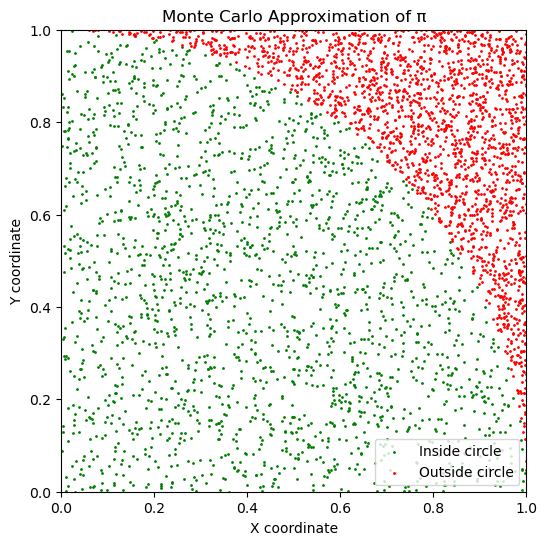

In [2]:
plt.figure(figsize=(6,6))

# Plot inside points (green) and outside points (red)
plt.scatter(x[inside_circle][:2000], 
            y[inside_circle][:2000], 
            color='green', s=1, label='Inside circle')
plt.scatter(x[~inside_circle][:2000], 
            y[~inside_circle][:2000], 
            color='red', s=1, label='Outside circle')

# Add labels and title
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Monte Carlo Approximation of π")

# Set axis limits for clarity
plt.xlim(0, 1)
plt.ylim(0, 1)

# Add legend
plt.legend()

plt.show()


## 5. Conclusion
- Using $N$ simulations, the estimated value of π was close to 3.14.
- Increasing $N$ will reduce variance and improve accuracy.
- This demonstrates how Monte Carlo simulations can approximate mathematical constants.
